In [1]:
import pathlib
import pandas as pd
import plotnine as gg

In [2]:
data_dir = pathlib.Path("../cell-painting/2.train")

beta_file = pathlib.Path(f"{data_dir}/level5_training.csv")
vanilla_file = pathlib.Path(f"{data_dir}/level5_training_vanilla.csv")
mmd_file = pathlib.Path(f"{data_dir}/level5_training_mmd.csv")

beta_file_random = pathlib.Path(f"{data_dir}/level5_training_random.csv")
vanilla_file_random = pathlib.Path(f"{data_dir}/level5_training_vanilla_random.csv")
mmd_file_random = pathlib.Path(f"{data_dir}/level5_training_mmd_random.csv")

In [10]:
beta_df = pd.read_csv(beta_file, index_col=0).assign(model="beta", shuffled="real").reset_index().rename(columns={"index": "epoch"})
vanilla_df = pd.read_csv(vanilla_file, index_col=0).assign(model="vanilla", shuffled="real").reset_index().rename(columns={"index": "epoch"})
mmd_df = pd.read_csv(mmd_file, index_col=0).assign(model="mmd", shuffled="real").reset_index().rename(columns={"index": "epoch"})

beta_df_random = pd.read_csv(beta_file_random, index_col=0).assign(model="beta", shuffled="shuffled").reset_index().rename(columns={"index": "epoch"})
vanilla_df_random = pd.read_csv(vanilla_file_random, index_col=0).assign(model="vanilla", shuffled="shuffled").reset_index().rename(columns={"index": "epoch"})
mmd_df_random = pd.read_csv(mmd_file_random, index_col=0).assign(model="mmd", shuffled="shuffled").reset_index().rename(columns={"index": "epoch"})

In [19]:
df = pd.concat([beta_df, vanilla_df, mmd_df, beta_df_random, vanilla_df_random, mmd_df_random])

print(df.shape)
df.head()

(460, 11)


,epoch,loss,val_loss,model,shuffled,recon,kl,val_recon,val_kl,mmd,val_mmd
0,0,30.083614,28.997597,beta,real,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7.804605,8.689045,beta,real,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6.057419,6.116002,beta,real,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4.963554,4.739501,beta,real,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.236126,4.094173,beta,real,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_melted = df.melt(id_vars=["epoch", "model", "shuffled"], value_vars=["loss", "val_loss"], var_name="loss_type", value_name="loss_value")
df_melted.head()

,epoch,model,shuffled,loss_type,loss_value
0,0,beta,real,loss,30.083614
1,1,beta,real,loss,7.804605
2,2,beta,real,loss,6.057419
3,3,beta,real,loss,4.963554
4,4,beta,real,loss,4.236126


In [40]:
df_melted.to_csv("training_curve_summary_data.csv", index = False)

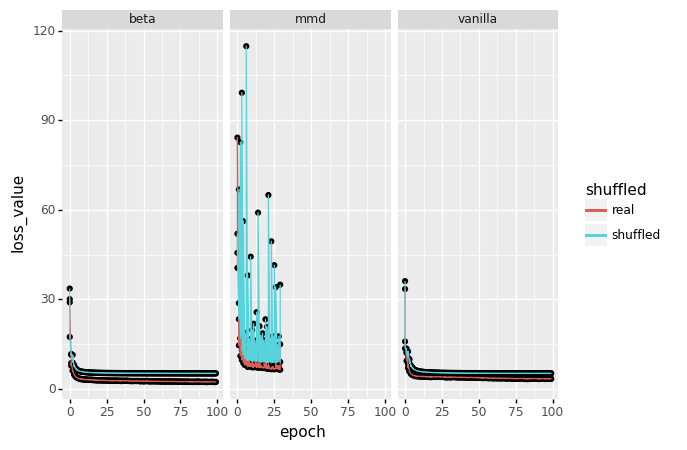

<ggplot: (8792563719381)>

In [38]:
(
    gg.ggplot(df_melted, gg.aes(x="epoch", y="loss_value"))
    + gg.geom_point()
    + gg.geom_line(gg.aes(color="shuffled"))
    + gg.facet_wrap("~model")
)